# Installing Dependencies and mounting Google Drive

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import requests
import urllib
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl

from bs4 import BeautifulSoup

!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

     |████████████████████████████████| 125 kB 4.9 MB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Loading the data and taking a look at it

In [5]:
# read pickle file as dataframe
df2 = pd.read_csv('/content/drive/MyDrive/news_data.csv')
df2.to_pickle('/content/drive/MyDrive/news_data_pk.pkl')    #to save the dataframe, df to 123.pkl
df2 = pd.read_pickle('/content/drive/MyDrive/news_data_pk.pkl') #to load 123.pkl back to the dataframe df
# print the dataframe



In [7]:
df2.head()

,Date,News source,Title,Description,index,timestamp,uid,url,url_uid
0,"Nov 7, 2013",ABC News,Who's Ringing the NYSE Bell for (TWTR) Twitter...,All of Twitter's co-founders and its CEO were ...,1,1650833231535,dpoSjD0JPk3DglsBIvyc,https://www.google.com/search?q=nyse:twtr+news...,1
1,"Nov 6, 2013",USA Today,All eyes on NYSE for Twitter IPO,Twitter IPO comes after embarrassing technolog...,2,1650833231535,rm2XVZbnbmSWhxVqHhRI,https://www.google.com/search?q=nyse:twtr+news...,1
2,"Nov 6, 2013",NBC News,Twitter prices shares at $26 for IPO,Goldman Sachs is the lead underwriter for the ...,3,1650833231535,9eMTUEvGPeZcGnunjUUe,https://www.google.com/search?q=nyse:twtr+news...,1
3,"Jun 5, 2015",MarketBeat,"Twitter Stock Forecast, Price & News (NYSE:TWTR)",Sign-up to receive the latest news and ratings...,4,1650833231535,D50w9deXMvl6IVcU3Zm3,https://www.google.com/search?q=nyse:twtr+news...,1
4,"Jul 22, 2021",PR Newswire,Twitter Announces Second Quarter 2021 Results,(NYSE: TWTR) today announced financial results...,5,1650833231535,4DdVTh94Pw4vS2LvAqPJ,https://www.google.com/search?q=nyse:twtr+news...,1


In [6]:
df2.tail()

,Date,News source,Title,Description,index,timestamp,uid,url,url_uid
245,"Mar 26, 2015",The Motley Fool,Why 1 Wall Street Firm Believes Twitter Inc. M...,What: Shares of social media networking giant ...,246,1650833231535,iuAejrBDjUICuuIIpEEv,https://www.google.com/search?q=nyse:twtr+news...,25
246,"Oct 4, 2015",The Business Journals,Twitter puts US real estate expansion in San F...,Twitter (NYSE:TWTR) and Hudson Pacific decline...,247,1650833231535,9FU2O6pDvAieHqNvM8FA,https://www.google.com/search?q=nyse:twtr+news...,25
247,"Feb 11, 2017",The Motley Fool,Twitter's Revenue is Already Starting to Decline,After Twitter reported its fourth quarter resu...,248,1650833231535,YsEpoWNS9EXejVfPWpMd,https://www.google.com/search?q=nyse:twtr+news...,25
248,"Apr 14, 2020",StockNews,TWTR: Taking a look at Twitter and Square Afte...,Taking a look at Twitter and Square After Thei...,249,1650833231535,T9dnvPx5yiZICZXuRlez,https://www.google.com/search?q=nyse:twtr+news...,25
249,"Jun 10, 2021",Reuters,U.S. calls on Nigeria to end Twitter suspension,Sign up to our tech newsletter to get the late...,250,1650833231535,Qb77XDF87eqZzQ5HiIjd,https://www.google.com/search?q=nyse:twtr+news...,25


In [8]:
phrase_1 = df2["Description"]
phrase_1

0      All of Twitter's co-founders and its CEO were ...
1      Twitter IPO comes after embarrassing technolog...
2      Goldman Sachs is the lead underwriter for the ...
3      Sign-up to receive the latest news and ratings...
4      (NYSE: TWTR) today announced financial results...
                             ...                        
245    What: Shares of social media networking giant ...
246    Twitter (NYSE:TWTR) and Hudson Pacific decline...
247    After Twitter reported its fourth quarter resu...
248    Taking a look at Twitter and Square After Thei...
249    Sign up to our tech newsletter to get the late...
Name: Description, Length: 250, dtype: object

In [9]:
phrase_1[0]

"All of Twitter's co-founders and its CEO were on the NYSE floor at the     time. By JON M. CHANG. November 7, 2013, 7:58 AM."

# Pre-processing

Splitting news description text by dot

In [10]:
def split_by_dot(x):
    return(x.split("."))

df2["phrase_split_by_dot"] = df2["Description"].apply(split_by_dot) 

df2["phrase_split_by_dot"]

0      [All of Twitter's co-founders and its CEO were...
1      [Twitter IPO comes after embarrassing technolo...
2      [Goldman Sachs is the lead underwriter for the...
3      [Sign-up to receive the latest news and rating...
4      [(NYSE: TWTR) today announced financial result...
                             ...                        
245    [What: Shares of social media networking giant...
246    [Twitter (NYSE:TWTR) and Hudson Pacific declin...
247    [After Twitter reported its fourth quarter res...
248    [Taking a look at Twitter and Square After The...
249    [Sign up to our tech newsletter to get the lat...
Name: phrase_split_by_dot, Length: 250, dtype: object

In [12]:
phrase_1[0]

"All of Twitter's co-founders and its CEO were on the NYSE floor at the     time. By JON M. CHANG. November 7, 2013, 7:58 AM."

Removing text with 'days ago' in the Date column

In [13]:
#df2.drop(["40"], inplace = True)

df2.index[40]

#df2.drop(df2[df2['Date'] = "days ago"].index, inplace = True)

df2 = df2[df2["Date"].str.contains("days") == False]
df2 = df2[df2["Date"].str.contains("ago") == False]

Specifying that the dataset is in time-series format


In [14]:
df2["Time"] = pd.to_datetime(df2["Date"], infer_datetime_format=True)
df2.head()

,Date,News source,Title,Description,index,timestamp,uid,url,url_uid,phrase_split_by_dot,Time
0,"Nov 7, 2013",ABC News,Who's Ringing the NYSE Bell for (TWTR) Twitter...,All of Twitter's co-founders and its CEO were ...,1,1650833231535,dpoSjD0JPk3DglsBIvyc,https://www.google.com/search?q=nyse:twtr+news...,1,[All of Twitter's co-founders and its CEO were...,2013-11-07
1,"Nov 6, 2013",USA Today,All eyes on NYSE for Twitter IPO,Twitter IPO comes after embarrassing technolog...,2,1650833231535,rm2XVZbnbmSWhxVqHhRI,https://www.google.com/search?q=nyse:twtr+news...,1,[Twitter IPO comes after embarrassing technolo...,2013-11-06
2,"Nov 6, 2013",NBC News,Twitter prices shares at $26 for IPO,Goldman Sachs is the lead underwriter for the ...,3,1650833231535,9eMTUEvGPeZcGnunjUUe,https://www.google.com/search?q=nyse:twtr+news...,1,[Goldman Sachs is the lead underwriter for the...,2013-11-06
3,"Jun 5, 2015",MarketBeat,"Twitter Stock Forecast, Price & News (NYSE:TWTR)",Sign-up to receive the latest news and ratings...,4,1650833231535,D50w9deXMvl6IVcU3Zm3,https://www.google.com/search?q=nyse:twtr+news...,1,[Sign-up to receive the latest news and rating...,2015-06-05
4,"Jul 22, 2021",PR Newswire,Twitter Announces Second Quarter 2021 Results,(NYSE: TWTR) today announced financial results...,5,1650833231535,4DdVTh94Pw4vS2LvAqPJ,https://www.google.com/search?q=nyse:twtr+news...,1,[(NYSE: TWTR) today announced financial result...,2021-07-22


In [15]:
df2 = df2.sort_values("Time")
df2 = df2.set_index("Time")
df2.head()

,Date,News source,Title,Description,index,timestamp,uid,url,url_uid,phrase_split_by_dot
Time,,,,,,,,,,
2013-09-26,"Sep 26, 2013",Los Angeles Times,Twitter's post-IPO stock symbol? Oddsmakers fa...,Las Vegas is also betting that Twitter will li...,176,1650833231535,V9ZWPYuMrb3OVLIDf8eU,https://www.google.com/search?q=nyse:twtr+news...,18,[Las Vegas is also betting that Twitter will l...
2013-10-04,"Oct 4, 2013",The Guardian,"Tweeter shares rocket 1,800% after news of Twi...","Tweeter trades under the stock symbol TWTRQ, j...",58,1650833231535,sa57Hg6MBugFX5HbqI7K,https://www.google.com/search?q=nyse:twtr+news...,6,"[Tweeter trades under the stock symbol TWTRQ, ..."
2013-10-15,"Oct 15, 2013",TechCrunch,Twitter Announces It Will List On The NYSE Und...,Nasdaq shares fell 1.6 percent on the news tha...,8,1650833231535,2Z5c9UYjWf7oPqOztj0d,https://www.google.com/search?q=nyse:twtr+news...,1,"[Nasdaq shares fell 1, 6 percent on the news t..."
2013-10-25,"Oct 25, 2013",CNBC,NYSE testing systems for Twitter IPO; Here's h...,Data is a real-time snapshot *Data is delayed ...,14,1650833231535,8SupbakaQh30oFLnKajk,https://www.google.com/search?q=nyse:twtr+news...,2,[Data is a real-time snapshot *Data is delayed...
2013-10-27,"Oct 27, 2013",The Guardian,Trial run of Twitter stock market flotation de...,Shares will trade under the ticker TWTR. Topic...,9,1650833231535,eSaF7jAuFQFX6Ee0syA9,https://www.google.com/search?q=nyse:twtr+news...,1,"[Shares will trade under the ticker TWTR, Top..."


# Sentiment analysis by sentence split by the dot

In [16]:
def sentimental_analysis_by_sentence(y):
    
    y = list(map(lambda x: analyser.polarity_scores(x)["compound"],y))
    y = np.array(y)
    y = y[y != 0]
    return(y)


In [17]:
phrase_2 = df2["phrase_split_by_dot"][4]
phrase_2

['Shares will trade under the ticker TWTR',
 ' Topics',
 ' Twitter · IPOs · Internet     · Blogging · Stock markets · New York · news',
 '']

Assigning polarity scores to sentences

In [18]:
sentimental_analysis_by_sentence(phrase_2)


array([0.296])

In [19]:
df2["sentimental_analysis_split_by_dot"] = df2["phrase_split_by_dot"].apply(sentimental_analysis_by_sentence) 

df2["sentimental_analysis_split_by_dot"]

Time
2013-09-26              [0.296]
2013-10-04                   []
2013-10-15              [0.296]
2013-10-25            [-0.2263]
2013-10-27              [0.296]
                    ...        
2022-02-16                   []
2022-02-16             [0.4404]
2022-02-17                   []
2022-02-18    [0.6249, -0.5106]
2022-02-18                   []
Name: sentimental_analysis_split_by_dot, Length: 250, dtype: object

In [20]:
df2

,Date,News source,Title,Description,index,timestamp,uid,url,url_uid,phrase_split_by_dot,sentimental_analysis_split_by_dot
Time,,,,,,,,,,,
2013-09-26,"Sep 26, 2013",Los Angeles Times,Twitter's post-IPO stock symbol? Oddsmakers fa...,Las Vegas is also betting that Twitter will li...,176,1650833231535,V9ZWPYuMrb3OVLIDf8eU,https://www.google.com/search?q=nyse:twtr+news...,18,[Las Vegas is also betting that Twitter will l...,[0.296]
2013-10-04,"Oct 4, 2013",The Guardian,"Tweeter shares rocket 1,800% after news of Twi...","Tweeter trades under the stock symbol TWTRQ, j...",58,1650833231535,sa57Hg6MBugFX5HbqI7K,https://www.google.com/search?q=nyse:twtr+news...,6,"[Tweeter trades under the stock symbol TWTRQ, ...",[]
2013-10-15,"Oct 15, 2013",TechCrunch,Twitter Announces It Will List On The NYSE Und...,Nasdaq shares fell 1.6 percent on the news tha...,8,1650833231535,2Z5c9UYjWf7oPqOztj0d,https://www.google.com/search?q=nyse:twtr+news...,1,"[Nasdaq shares fell 1, 6 percent on the news t...",[0.296]
2013-10-25,"Oct 25, 2013",CNBC,NYSE testing systems for Twitter IPO; Here's h...,Data is a real-time snapshot *Data is delayed ...,14,1650833231535,8SupbakaQh30oFLnKajk,https://www.google.com/search?q=nyse:twtr+news...,2,[Data is a real-time snapshot *Data is delayed...,[-0.2263]
2013-10-27,"Oct 27, 2013",The Guardian,Trial run of Twitter stock market flotation de...,Shares will trade under the ticker TWTR. Topic...,9,1650833231535,eSaF7jAuFQFX6Ee0syA9,https://www.google.com/search?q=nyse:twtr+news...,1,"[Shares will trade under the ticker TWTR, Top...",[0.296]
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-16,"Feb 16, 2022",Seeking Alpha,Twitter expands crypto tips feature with ether...,Twitter (NYSE:TWTR) on Wednesday added ethereu...,52,1650833231535,1ZsJZ2gHgHpBr4gGKDKf,https://www.google.com/search?q=nyse:twtr+news...,6,[Twitter (NYSE:TWTR) on Wednesday added ethere...,[]
2022-02-16,"Feb 16, 2022",The Motley Fool,Is Twitter Stock a Buy Now?,Key Points · NYSE: TWTR · The social media com...,84,1650833231535,nmGyEw5mu9lKlKLnLMdS,https://www.google.com/search?q=nyse:twtr+news...,9,[Key Points · NYSE: TWTR · The social media co...,[0.4404]
2022-02-17,"Feb 17, 2022",Benzinga,Twitter Unveils New Feature - No It's Not 'Edi...,Twitter Inc · The microblogging website now al...,218,1650833231535,wCJt38LRsJVe9JdRMifW,https://www.google.com/search?q=nyse:twtr+news...,22,[Twitter Inc · The microblogging website now a...,[]


Assigning mean polarity scores

In [21]:
df2["sentimental_analysis_split_by_dot_average"] = df2["sentimental_analysis_split_by_dot"].apply(np.mean) 

df2["sentimental_analysis_split_by_dot_average"]

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


Time
2013-09-26    0.29600
2013-10-04        NaN
2013-10-15    0.29600
2013-10-25   -0.22630
2013-10-27    0.29600
               ...   
2022-02-16        NaN
2022-02-16    0.44040
2022-02-17        NaN
2022-02-18    0.05715
2022-02-18        NaN
Name: sentimental_analysis_split_by_dot_average, Length: 250, dtype: float64

Take only rows where the value is not NaN

In [22]:
df2 = df2[df2["sentimental_analysis_split_by_dot_average"].notna()]

In [23]:
df2["sentimental_analysis_split_by_dot_average"]

Time
2013-09-26    0.29600
2013-10-15    0.29600
2013-10-25   -0.22630
2013-10-27    0.29600
2013-11-06   -0.64860
               ...   
2022-02-14    0.09035
2022-02-14    0.51060
2022-02-15   -0.31820
2022-02-16    0.44040
2022-02-18    0.05715
Name: sentimental_analysis_split_by_dot_average, Length: 179, dtype: float64

In [24]:
df2.info

<bound method DataFrame.info of                     Date        News source  \
Time                                          
2013-09-26  Sep 26, 2013  Los Angeles Times   
2013-10-15  Oct 15, 2013         TechCrunch   
2013-10-25  Oct 25, 2013               CNBC   
2013-10-27  Oct 27, 2013       The Guardian   
2013-11-06   Nov 6, 2013          USA Today   
...                  ...                ...   
2022-02-14  Feb 14, 2022           Benzinga   
2022-02-14  Feb 14, 2022           TipRanks   
2022-02-15  Feb 15, 2022     Simply Wall St   
2022-02-16  Feb 16, 2022    The Motley Fool   
2022-02-18  Feb 18, 2022      Seeking Alpha   

                                                        Title  \
Time                                                            
2013-09-26  Twitter's post-IPO stock symbol? Oddsmakers fa...   
2013-10-15  Twitter Announces It Will List On The NYSE Und...   
2013-10-25  NYSE testing systems for Twitter IPO; Here's h...   
2013-10-27  Trial run of Twitte

# Apply sentiment analysis to the whole description of the news title without any splitting by dot

---



In [25]:
def sentimental_analysis(y):
    
    return(analyser.polarity_scores(y)["compound"])

In [29]:
df2["sentimental_analysis_oncomplete_text"] = df2["Description"].apply(sentimental_analysis) 

df2["sentimental_analysis_oncomplete_text"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Time
2013-09-26    0.2960
2013-10-15    0.2960
2013-10-25   -0.2263
2013-10-27    0.2960
2013-11-06   -0.6486
               ...  
2022-02-14    0.2263
2022-02-14    0.5106
2022-02-15   -0.5574
2022-02-16    0.4404
2022-02-18    0.2023
Name: sentimental_analysis_oncomplete_text, Length: 179, dtype: float64

Assigning mean polarity scores

In [30]:
df2["sentimental_analysis_oncomplete_text_average"] = df2["sentimental_analysis_oncomplete_text"].apply(np.mean) 

df2["sentimental_analysis_oncomplete_text_average"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Time
2013-09-26    0.2960
2013-10-15    0.2960
2013-10-25   -0.2263
2013-10-27    0.2960
2013-11-06   -0.6486
               ...  
2022-02-14    0.2263
2022-02-14    0.5106
2022-02-15   -0.5574
2022-02-16    0.4404
2022-02-18    0.2023
Name: sentimental_analysis_oncomplete_text_average, Length: 179, dtype: float64

# Analysis plots of the sentences split by dot and those not split

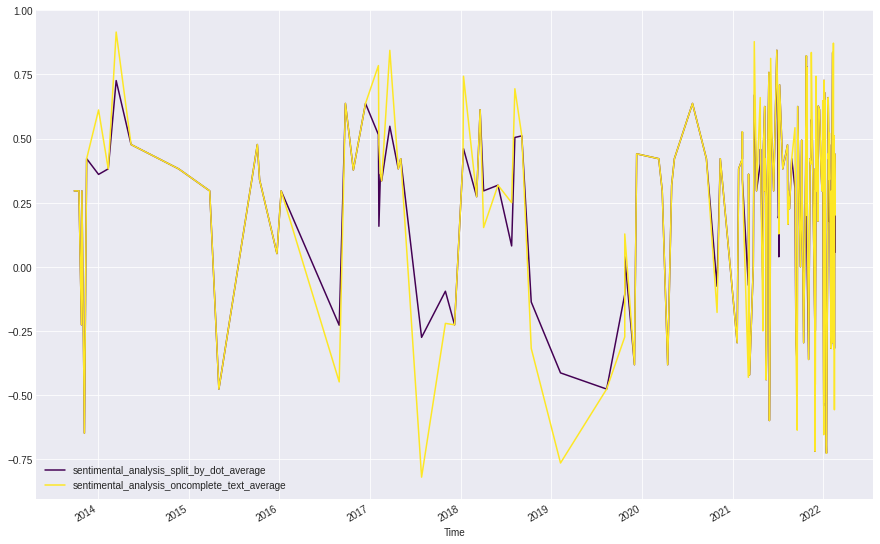

In [32]:
plt.style.use('seaborn-dark')
df2[["sentimental_analysis_split_by_dot_average","sentimental_analysis_oncomplete_text_average"]].plot(cmap = "viridis",linestyle='-',figsize = (15,10))
plt.grid()
plt.show()

# Save data to be used in other code noteboooks

In [33]:
df2.to_pickle("/content/drive/MyDrive/twitter_processed_text_with_time_and_sentiments.pkl")